## Program #2: Benchmarking Insertion and Selection Sorts
Catherine Mett, Noah Nieberle, Dominic Palermo


#### Introduction
In this assignment, we implemented the insertion and selection sorts discussed in class. We then ran some tests and benchmarked these algorithms to show correctness and the difference between their runtimes when given best, worst and average case scenarios. Graphs of these runtimes are shown in the analysis of the results. 

#### Algorithm Implementations
##### Insertion sort

In [23]:
def insertion_sort(arr):
    if(len(arr)):
        return
    for i in range(1,len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = key 
        
arr = [12, 11, 13, 5, 6,324,36,-3,423]
insertion_sort(arr)
print(arr)


[12, 11, 13, 5, 6, 324, 36, -3, 423]


##### Selection Sort

In [24]:
def selection_sort(arr):
    for j in range(0, len(arr)-1):
        smallest = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[smallest]:
                smallest = i
        temp = arr[j]
        arr[j] = arr[smallest]
        arr[smallest] = temp

#### Algorithm Tests

In [25]:
test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
insertion_sort(test1)
insertion_sort(test2)
insertion_sort(test3)
print("Insertion Sort:")
print(test1)
print(test2)
print(test3)

test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
selection_sort(test1)
selection_sort(test2)
selection_sort(test3)
print("\nSelection Sort:")
print(test1)
print(test2)
print(test3)

Insertion Sort:
[12, 11, 13, 5, 6, 324, 36, -3, 423]
[-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

Selection Sort:
[-3, 5, 6, 11, 12, 13, 36, 324, 423]
[-459, -301, -300, -232, -5, 0, 8, 21, 59, 60]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Benchmarking

In [26]:
import time
from time import perf_counter
import random
import matplotlib.pyplot as plt
import statistics


def benchmark(sorting_algorithm, input_list):
    """
    Performs 3 tests on the sorting algorithm given an input list, where the input is shuffled, sorted, and reversed
    Return: Average of 5 benchmark times for each algorithm on an input list
    """
    shuffle_input_list = input_list.copy()
    #Shuffled list
    start_time = time.perf_counter()
    sorting_algorithm(shuffle_input_list)
    shuffled_benchmark_time = time.perf_counter() - start_time

    sort_input_list = input_list.copy()
    #Sorted List
    input_list.sort()
    start_time = time.perf_counter()
    sorting_algorithm(sort_input_list)
    sorted_benchmark_time = time.perf_counter() - start_time

    reverse_input_list = input_list.copy()
    #Reversed List
    input_list.reverse()
    start_time = time.perf_counter()
    sorting_algorithm(reverse_input_list)
    reversed_benchmark_time = time.perf_counter() - start_time
    return (shuffled_benchmark_time, sorted_benchmark_time, reversed_benchmark_time)

def generate_input_list(n):
    return [random.randint(0,100) for _ in range(n)]


list_sizes = [100, 1000, 10000, 15000]
# list_sizes = [100,1000,100000]

#Lists to hold the benchmark times for each algorithm
sorted_times_insertion = []
shuffled_times_insertion = []
reversed_times_insertion = []
sorted_times_selection = []
shuffled_times_selection = []
reversed_times_selection = []
trial_count = 5
for list_size in list_sizes:
    #Lists will hold the benchmark times for sorting of size n
    selection_shuffled_times = []
    selection_sorted_times = []
    selection_reversed_times = []
    insertion_shuffled_times = []
    insertion_sorted_times = []
    insertion_reversed_times = []
    for trial in range(trial_count):
        #Data is randomly generated
        data = generate_input_list(list_size)
        #Selection sort
        benchmark_times = benchmark(selection_sort, data)

        shuffled_time = benchmark_times[0]
        sorted_time = benchmark_times[1]
        reversed_time = benchmark_times[2]

        selection_shuffled_times.append(shuffled_time)
        selection_sorted_times.append(sorted_time)
        selection_reversed_times.append(reversed_time)

        #Insertion Sort
        benchmark_times_insertion_sort = benchmark(insertion_sort, data)

        shuffled_time = benchmark_times[0]
        sorted_time = benchmark_times[1]
        reversed_time = benchmark_times[2]

        #Times for insertion sort with list size N
        insertion_shuffled_times.append(shuffled_time)
        insertion_sorted_times.append(sorted_time)
        insertion_reversed_times.append(reversed_time)
        print(trial)

    #The average time of selection sort algorithm for sorted, shuffled, and reversed input lists of size n
    selection_sorted_average_time = statistics.fmean(selection_sorted_times)
    selection_shuffled_average_time = statistics.fmean(selection_shuffled_times)
    selection_reversed_average_time = statistics.fmean(selection_reversed_times)

    #The average time of insertion sort algorithm for sorted, shuffled, and reversed input lists of size n
    insertion_sorted_average_time = statistics.fmean(selection_sorted_times)
    insertion_shuffled_average_time = statistics.fmean(selection_sorted_times)
    insertion_reversed_average_time = statistics.fmean(selection_reversed_times)

    sorted_times_selection.append(selection_sorted_average_time)
    shuffled_times_selection.append(selection_shuffled_average_time)
    reversed_times_selection.append(selection_reversed_average_time)

    sorted_times_insertion.append(insertion_sorted_average_time)
    shuffled_times_insertion.append(insertion_shuffled_average_time)
    reversed_times_insertion.append(insertion_reversed_average_time)
    print(list_size)

0
1
2
3
4
100
0
1
2
3
4
1000
0
1
2
3
4
10000
0
1
2
3
4
15000


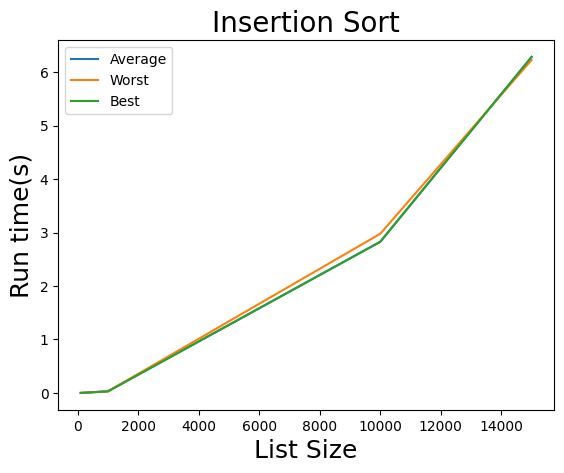

In [27]:
plt.plot(list_sizes, shuffled_times_insertion, label="Average")
plt.plot(list_sizes, reversed_times_insertion, label="Worst")
plt.plot(list_sizes, sorted_times_insertion, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

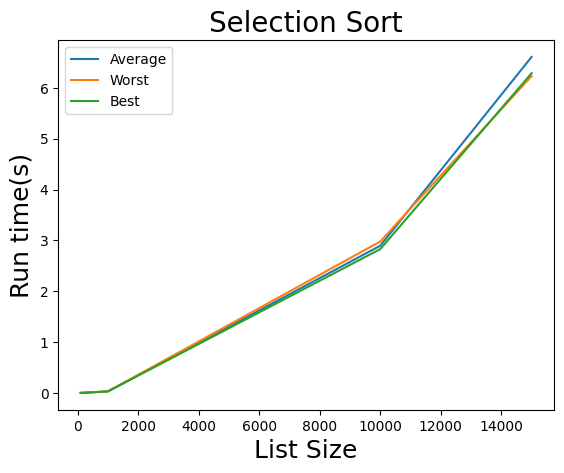

In [28]:
plt.plot(list_sizes, shuffled_times_selection, label="Average")
plt.plot(list_sizes, reversed_times_selection, label="Worst")
plt.plot(list_sizes, sorted_times_selection, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

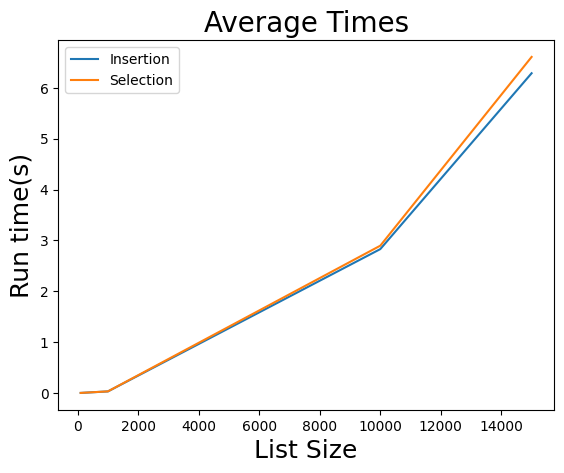

In [29]:
plt.plot(list_sizes, shuffled_times_insertion, label="Insertion")
plt.plot(list_sizes, shuffled_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Average Times", fontsize=20)
plt.legend()

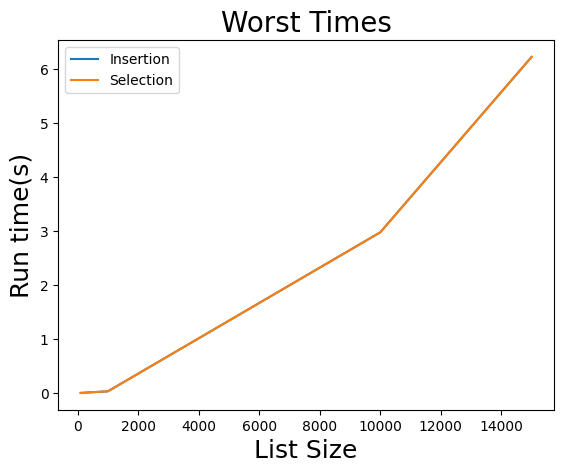

In [30]:
plt.plot(list_sizes, reversed_times_insertion, label="Insertion")
plt.plot(list_sizes, reversed_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Worst Times", fontsize=20)
plt.legend()

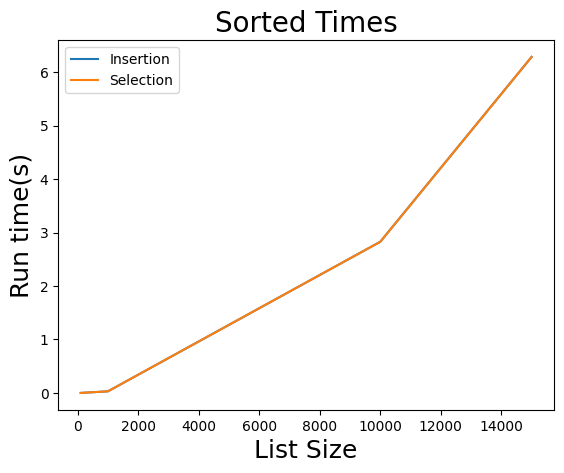

In [31]:

plt.plot(list_sizes, sorted_times_insertion, label="Insertion")
plt.plot(list_sizes, sorted_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Sorted Times", fontsize=20)
plt.legend()
